# H1N1 and Seasonal Flu Vaccine Predictions

![flu](images/flu_banner.jpeg)

Final Project Submission
 - Student name: Anna Chantharasouk, Abass Ibrahim, Gregory Han
 - Student pace: Full time
 - Scheduled project review: 01/28/2022, 1:30 pm
 - Instructor name: Skylar English

## Project Overview

We have been hired by the CDC as a part of a campaign to increase awareness and encourage more individuals to get vaccinated. We will assist them in making recommendations of how to increase awareness and identify which factors most influence people to get vaccinated.

## Business Problem

Which factors most influence whether a person receives a seasonal or H1N1 flu vaccine?

### Guiding Questions for Predictive Modeling

 - Which model is the most effective in predicting whether a person received a seasonal flu shot?
 - Which model is the most effective in predicting whether a person received a H1N1 flu shot?
 - Which features are the most important in predicting whether a person received a seasonal flu shot?
 - Which features are the most important in predicting whether a person received a H1N1 flu shot?

## Data Collection

The data for our study is obtained from the National 2009 H1N1 Flu Survey (NHFS) which was held by the Centres for Disease Control and Prevention (CDC). This survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. This data was obtained to get a fair idea about the knowledge of people on the effectiveness and safety of flu vaccines and to learn why some people refrained from getting vaccinated against the H1N1 flu and seasonal flu.

The dataset found in 'trains' below contains the following columns/ information:

 - `h1n1_vaccine` - Have they received H1N1 flu vaccine
 - `seasonal_vaccine` - Have they received seasonal flu vaccine
 - `h1n1_concern` - Level of concern about the H1N1 flu on a scale from 0-3
 - `h1n1_knowledge` - Level of knowledge about H1N1 flu on a scale from 0-3
 - `behavioral_antiviral_meds` - Have they taken antiviral medications (binary)
 - `behavioral_avoidance` - Do they avoid close contact with others with flu-like symptoms (binary)
 - `behavioral_face_mask` - Do they have a face mask (binary)
 - `behavioral_wash_hands` - Do they frequently wash their hands (binary)
 - `behavioral_large_gatherings` - Have they avoided large gatherings (binary)
 - `behavioral_outside_home` - Have they reduced contact with people outside of their own home (binary)
 - `behavioral_touch_face` - Do they avoid touching their face (binary)
 - `doctor_recc_h1n1` - Was the H1N1 flu vaccine was recommended by doctor (binary)
 - `doctor_recc_seasonal` - Was the Seasonal flu vaccine was recommended by doctor (binary)
 - `chronic_med_condition` - Do they have chronic medical conditions (binary)
 - `child_under_6_months` - Are they in close contact with a child under the age of six months (binary)
 - `health_worker` - Are they a healthcare worker (binary)
 - `health_insurance` - Do they have health insurance (binary)
 - `opinion_h1n1_vacc_effective` - What is their opinion about H1N1 vaccine effectiveness on a scale from 1-5
 - `opinion_h1n1_risk` - What is their opinion about risk of getting sick with H1N1 flu without vaccine on a scale from 1-5
 - `opinion_h1n1_sick_from_vacc` - Are they worried about getting sick from taking H1N1 vaccine on a scale from 1-5
 - `opinion_seas_vacc_effective` - What is their opinion about seasonal flu vaccine effectiveness on a scale from 1-5
 - `opinion_seas_risk` - What is their opinion about risk of getting sick with seasonal flu without vaccine on a scale from 1-5
 - `opinion_seas_sick_from_vacc` - Are they worried about getting sick from taking seasonal flu vaccine on a scale from 1-5
 - `age_group` - What age group do they fall into
 - `education` - What is their education level
 - `race` - Race
 - `sex` - Sex
 - `income_poverty` - Household annual income with respect to 2008 Census poverty thresholds
 - `marital_status` - Married or Not Married
 - `rent_or_own` - Housing situation (Rent or Own)
 - `employment_status` - Employment status (Employed or Unemployed)
 - `hhs_geo_region` - Residence using a 10-region geographic classification - values are random character strings
 - `census_msa` - Where is the residence within metropolitan statistical areas (MSA) as defined by the U.S. Census
 - `household_adults` - Number of other adults in household, top-coded to 3
 - `household_children` - Number of children in household, top-coded to 3
 - `employment_industry` - Type of industry they are employed in - values are random character strings
 - `employment_occupation` - Type of occupation - values are random character strings.

### Imports

We imported the necessary tools that will be used for our analysis and applied functions that will clean and prep our dataset for descriptive and inferential analysis.

In [1]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import numpy as np
import pandas_profiling as pp
%matplotlib inline

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Data Preparation

We load our data and prepare the data by imputing to fill our null/nan values.

In [8]:
train = pd.read_csv('data/training_set_features.csv', index_col='respondent_id')
labels = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id')
test = pd.read_csv('data/test_set_features.csv', index_col='respondent_id')

In [9]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [10]:
train.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [13]:
train.fillna(train.median(),inplace=True)

In [14]:
train.replace(np.nan,'unknown',inplace=True)

In [15]:
train.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

## Data Analysis

We do an exploratory data analysis on our dataset before making our predictions on our targets.

There are two target variables found in the labels dataset:

 - **h1n1_vaccine** - Whether respondent received H1N1 flu vaccine.
 - **seasonal_vaccine** - Whether respondent received seasonal flu vaccine.
 
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both.

We use pandas profiling to have pandas make initial observations on our dataset.

In [16]:
train_and_labels_df = train.join(labels)

In [42]:
pp.ProfileReport(train_and_labels_df)

We also plot our features against our targets ('H1N1 Vaccine and Seasonal Vaccine') to see if there are any correlations.

In [18]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (train_and_labels_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

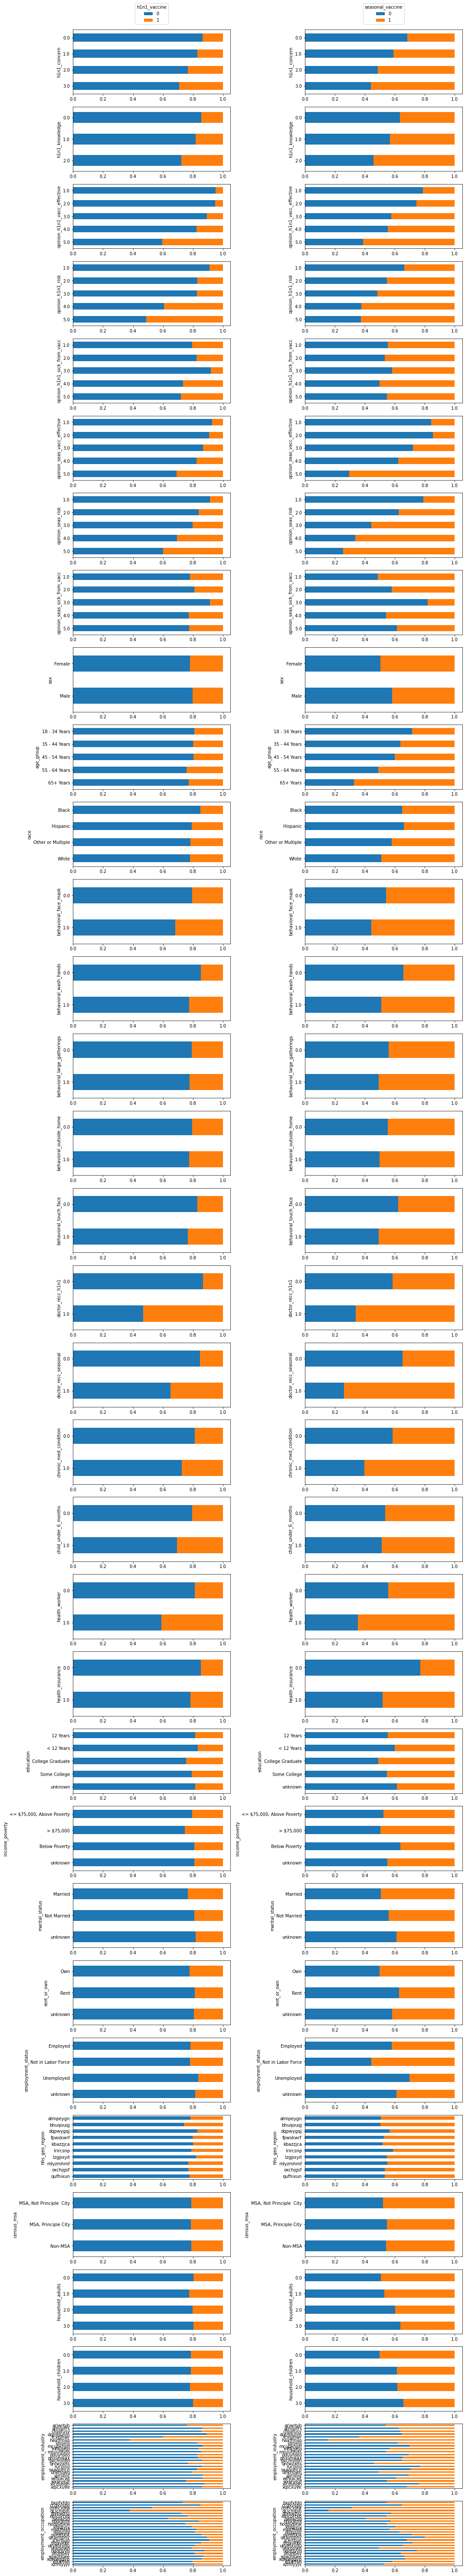

In [19]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
    'health_insurance', 
    'education', 
    'income_poverty', 
    'marital_status',
    'rent_or_own', 
    'employment_status', 
    'hhs_geo_region', 
    'census_msa',
    'household_adults', 
    'household_children', 
    'employment_industry',
    'employment_occupation'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(15,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', train_and_labels_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', train_and_labels_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()
plt.show();

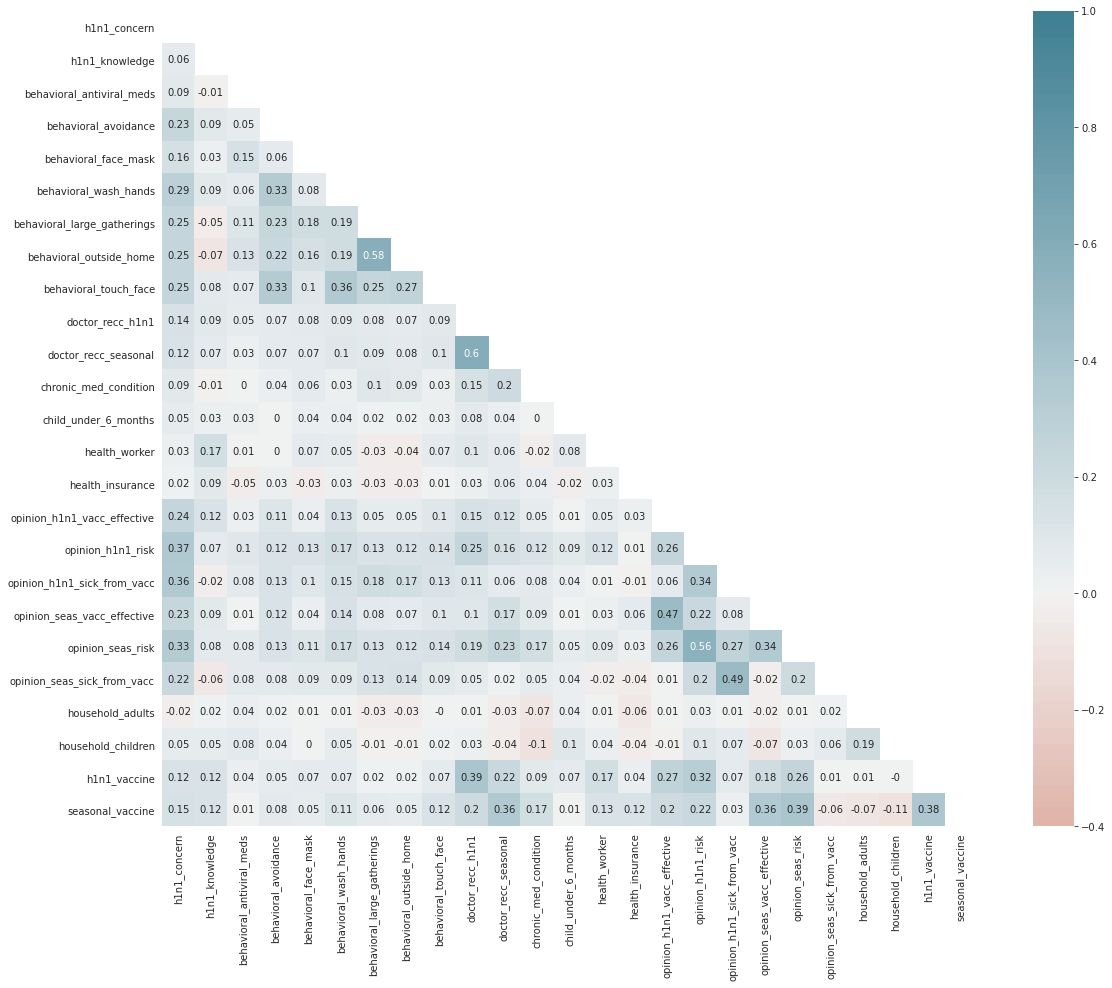

In [21]:
corr = train_and_labels_df.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n = 200),annot= True, 
                     xticklabels = corr.columns.values,
                     yticklabels = corr.columns.values,
                     vmin = -.4,
                     vmax = 1,
                     center = 0,
                     mask=mask, square=True)

It seems like there are some features that are opinion based that are highly correlated to our targets. 

Let's also take a look at our target datasets.

### H1N1

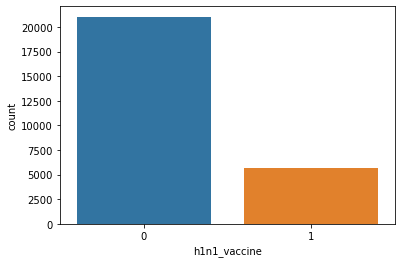

In [22]:
sns.countplot(x=labels.h1n1_vaccine, data=labels);

### Seasonal

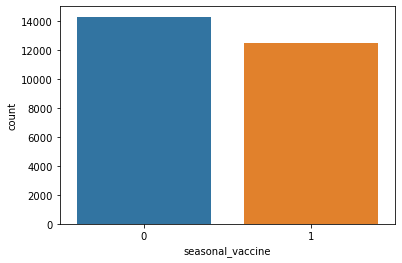

In [23]:
sns.countplot(x=labels.seasonal_vaccine, data=labels);

Now that we have a better understanding of our data, we will make our models to see which can predict the best on whether someone will get the H1N1/seasonal vaccine.

The our model notebooks will be located as such:
- **Baseline Models**
- **Logistic Regression**
- **Random Forests Models**
- **CatBoost**
- **Best-Model-CatBoost + CV w/ Optuna**

## Best Model

The best model that we used to predict our targets was the CatBoost Classifier using cross validation with Bayesian optimization package Optuna to tune the hyperparameters. CatBoost had a ROCAUC score of .87 and accuracy of 85% for H1N1 vaccine predictions and a ROCAUC score of .86 and accuracy of 78%.

In [3]:
model_rocauc_h1n1 = ({'Naive_Bayes_Base':0.715, 
                'Logistic_Regression_Base':0.864, 
                'Logistic_Regression_RandomSearch':0.862, 
                'Random_Forest_Base':0.8431,
                'Random_Forest_RandomSearch':0.869,
                'Gradient_Boost_Base':0.825,
                'Gradient_Boost_RandomSearch':0.856,
                'CatBoost w/ Optuna':0.871})

model_rocauc_seasonal = ({'Naive_Bayes_Base':0.721,
                'Logistic_Regression_Base':0.859, 
                'Logistic_Regression_RandomSearch':0.860, 
                'Random_Forest_Base':0.843, 
                'Random_Forest_RandomSearch':0.859,
                'Gradient_Boost_Base':0.852,
                'Gradient_Boost_RandomSearch':0.863, 
                'CatBoost w/ Optuna':0.860})

C:\Users\grego\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


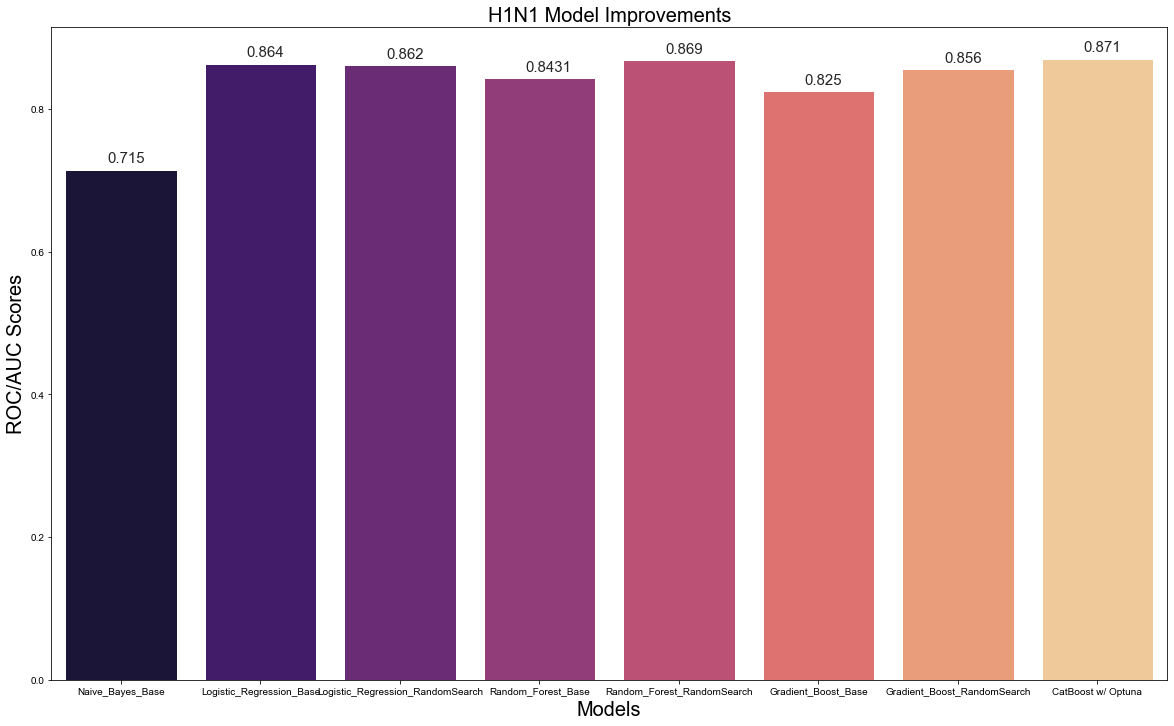

In [4]:
x = list(model_rocauc_h1n1.keys())
y = list(model_rocauc_h1n1.values())


fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")


ax = sns.barplot(x, y, palette='magma')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('ROC/AUC Scores', color='black', fontsize=20)
ax.set_title('H1N1 Model Improvements', fontsize=20)

for i, v in enumerate(y):
    plt.text(i - 0.1, v + 0.01, str(v), fontsize=15)
plt.show();

C:\Users\grego\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


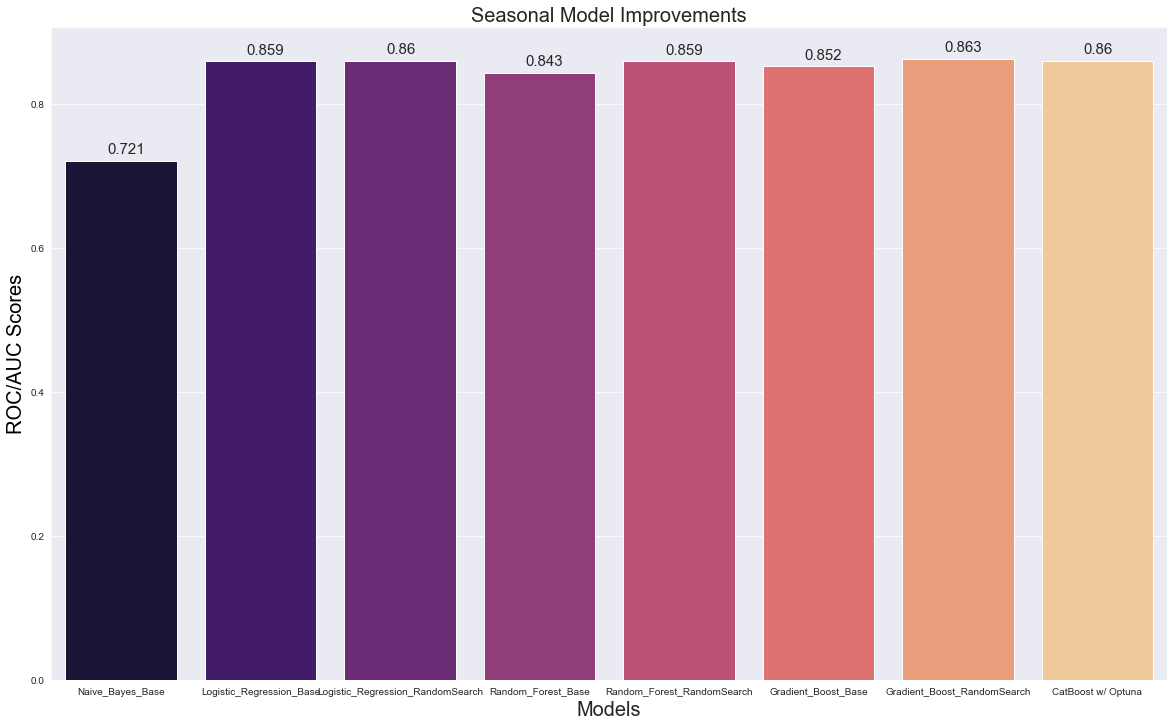

In [5]:
x1 = list(model_rocauc_seasonal.keys())
y1 = list(model_rocauc_seasonal.values())


fig, ax = plt.subplots(figsize=(20,12))
sns.set_style("darkgrid")

ax = sns.barplot(x1, y1, palette='magma')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('ROC/AUC Scores', color='black', fontsize=20)
ax.set_title('Seasonal Model Improvements', fontsize=20)

for i, v in enumerate(y1):
    plt.text(i - 0.1, v + 0.01, str(v), fontsize=15)
plt.show();

© Anna Chantharasouk, Abass Ibrahim, Gregory Han May 2020